In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Checking for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic.shape

(891, 12)

In [5]:
#Dropping some variables
titanic.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [6]:
X= titanic.drop(["Survived"],axis=1)

In [7]:
y= titanic['Survived']

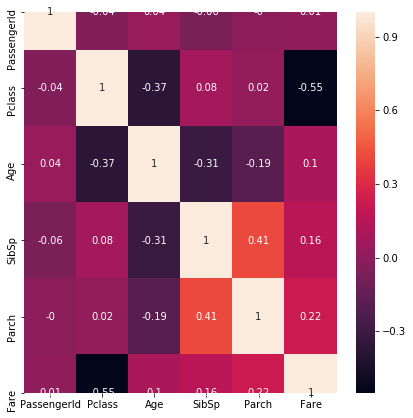

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(X.corr().round(2),annot=True)

In [11]:
X['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [42]:
comp= pd.crosstab(titanic['Age'], titanic['Survived'], rownames=['age'], colnames=['survived'])

In [44]:
comp.iloc[0:40,:]

survived,0,1
age,,
0.42,0,1
0.67,0,1
0.75,0,2
0.83,0,2
0.92,0,1
1.00,2,5
2.00,7,3
3.00,1,5
4.00,3,7


In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
titanic.groupby("Survived")["Age"].median()

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

C:\Users\melchiz shroff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\melchiz shroff\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\melchiz shroff\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\melchiz shroff\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


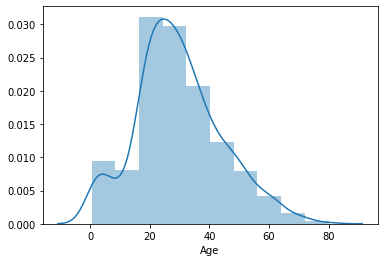

In [48]:
sns.distplot(X['Age'], bins=10)
plt.show()

We will subsititute the missing values in age with respect to target variable via acquired median value

In [49]:
X["Age"].fillna(28,inplace=True)

In [50]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [56]:
X['Embarked'].fillna('S',inplace=True)

In [57]:
X.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [58]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,28.0,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [61]:
X['Pclass']= X['Pclass'].astype('category')

In [62]:
X['Sex']= X['Sex'].astype('category')
X['Embarked']= X['Embarked'].astype('category')

In [63]:
X['Sex_cat']= X['Sex'].cat.codes

In [65]:
X['Embarked_cat']= X['Embarked'].cat.codes

In [67]:
X.drop(['Sex','Embarked'],axis=1, inplace=True)

[Text(0.5, 1.0, 'survived')]

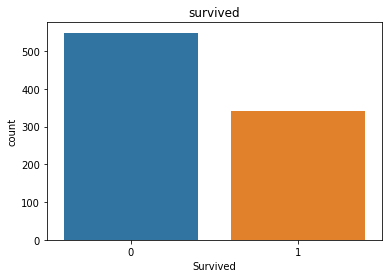

In [68]:
sns.countplot(x=titanic["Survived"]).set(title = 'survived')

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
model_dt = DecisionTreeClassifier()
# Fitting on train data
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
y_pred = model_dt.predict(X_test)

In [73]:
result= pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
result

Predicted,0,1
Actual,,
0,126,31
1,28,83


In [74]:
accuracy_score(y_test,y_pred)

0.7798507462686567